In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def count_words(text):
    '''
    Count the number of times each word occurs in text (str).
    Return dictionary where keys are unique words and values are
    word counts. Skips punctuation
    '''
    
    #lower case letters
    text = text.lower()
    
    #skip punctuation
    skips = ['.', ',',':', ';', "'", '"']
    for ch in skips:
        text = text.replace(ch, "")
    
    word_counts = {}
    for word in text.split(" "):
        #known word
        if word in word_counts:
            word_counts[word] +=1 
        #unknown word
        else:
            word_counts[word] = 1
    return word_counts

def read_book(title_path):
    '''
    Read a book and retirn it as a string
    '''
    with open(title_path, 'r', encoding = 'UTF-8') as current_file:
        text = current_file.read()
        text = text.replace('\n', '').replace('\r', '')
    return text

def word_stats(word_counts):
    '''
    Return number of unique words and
    word frequences
    '''
    num_unique = len(word_counts)
    counts = word_counts.values()
    return (num_unique, counts)

In [53]:
book_dir = './books'
os.listdir(book_dir)
stats = pd.DataFrame(columns = ('Language', 'Author', 'Title', 'Length', 'Unique' ))
title_num = 1

In [54]:
for language in os.listdir(book_dir):
    for author in os.listdir(book_dir + "/" + language):
        for title in os.listdir(book_dir + "/" + language + '/' + author):
            inputfile = book_dir + '/' + language + '/' + author + '/' + title
            print(inputfile)
            text = read_book(inputfile)
            (num_unique, counts) = word_stats(count_words(text))
            stats.loc[title_num] = language, author, title, sum(counts), num_unique
            title_num += 1

./books/English/shakespeare/A Midsummer Night's Dream.txt
./books/English/shakespeare/Hamlet.txt
./books/English/shakespeare/Macbeth.txt
./books/English/shakespeare/Othello.txt
./books/English/shakespeare/Richard III.txt
./books/English/shakespeare/Romeo and Juliet.txt
./books/English/shakespeare/The Merchant of Venice.txt
./books/French/chevalier/L'åle de sable.txt
./books/French/chevalier/L'enfer et le paradis de l'autre monde.txt
./books/French/chevalier/La capitaine.txt
./books/French/chevalier/La fille des indiens rouges.txt
./books/French/chevalier/La fille du pirate.txt
./books/French/chevalier/Le chasseur noir.txt
./books/French/chevalier/Les derniers Iroquois.txt
./books/French/de Maupassant/Boule de Suif.txt
./books/French/de Maupassant/Claire de Lune.txt
./books/French/de Maupassant/Contes de la Becasse.txt
./books/French/de Maupassant/L'inutile beautÇ.txt
./books/French/de Maupassant/La Main Gauche.txt
./books/French/de Maupassant/La Maison Tellier.txt
./books/French/de M

In [56]:
stats.Length

1       16103.0
2       28551.0
3       16874.0
4       26590.0
5       48315.0
6       40776.0
7       20949.0
8       73801.0
9       40827.0
10      46306.0
11      66621.0
12      52519.0
13      51341.0
14      55565.0
15      35905.0
16      25975.0
17      34723.0
18      37840.0
19      33481.0
20      43685.0
21      40688.0
22      41485.0
23      54772.0
24      10938.0
25      11125.0
26      21973.0
27       8510.0
28       4980.0
29      12370.0
30      85756.0
         ...   
73      20311.0
74      74446.0
75      52996.0
76      48022.0
77      43575.0
78      46751.0
79      47739.0
80      61473.0
81      46927.0
82      46709.0
83      43445.0
84      45182.0
85      54151.0
86      45461.0
87      41175.0
88      50751.0
89      48889.0
90     134382.0
91     130834.0
92     109270.0
93      65225.0
94      52982.0
95      98218.0
96      77627.0
97      44293.0
98     128630.0
99      21440.0
100    107303.0
101    195771.0
102     30567.0
Name: Length, dtype: flo

In [57]:
stats.Unique

1       4345.0
2       6776.0
3       4780.0
4       5898.0
5       5449.0
6       5118.0
7       4978.0
8      18989.0
9      10831.0
10     13083.0
11     17875.0
12     14649.0
13     12945.0
14     15583.0
15     10725.0
16      8076.0
17     10210.0
18     10781.0
19      9983.0
20     12305.0
21     10890.0
22     11091.0
23     15028.0
24      3674.0
25      3720.0
26      6337.0
27      2929.0
28      1876.0
29      4370.0
30     18744.0
        ...   
73      7527.0
74     18238.0
75     14549.0
76     15133.0
77     12761.0
78     12884.0
79     14337.0
80     16987.0
81     13456.0
82     13450.0
83     12478.0
84     12622.0
85     15871.0
86     13180.0
87     12316.0
88     14779.0
89     14395.0
90     30728.0
91     27834.0
92     26786.0
93     19230.0
94     16648.0
95     25353.0
96     21399.0
97     13898.0
98     29300.0
99      7836.0
100    27644.0
101    40665.0
102     9700.0
Name: Unique, dtype: float64

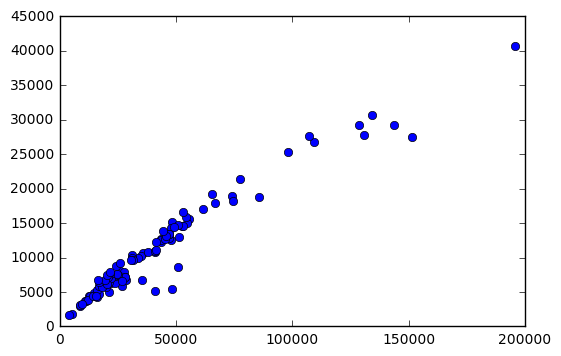

In [59]:
plt.plot(stats.Length, stats.Unique, 'bo')
plt.show()

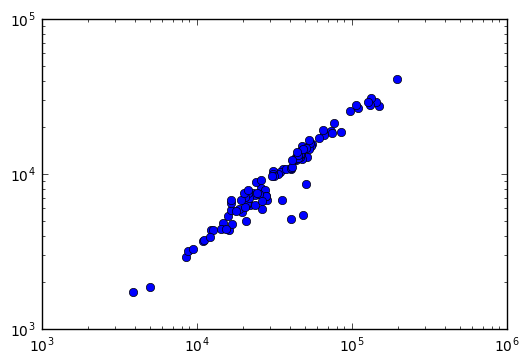

In [60]:
plt.loglog(stats.Length, stats.Unique, 'bo')
plt.show()

In [61]:
stats[stats.Language == 'English']

,Language,Author,Title,Length,Unique
1,English,shakespeare,A Midsummer Night's Dream.txt,16103.0,4345.0
2,English,shakespeare,Hamlet.txt,28551.0,6776.0
3,English,shakespeare,Macbeth.txt,16874.0,4780.0
4,English,shakespeare,Othello.txt,26590.0,5898.0
5,English,shakespeare,Richard III.txt,48315.0,5449.0
6,English,shakespeare,Romeo and Juliet.txt,40776.0,5118.0
7,English,shakespeare,The Merchant of Venice.txt,20949.0,4978.0


In [62]:
stats[stats.Language == 'French']

,Language,Author,Title,Length,Unique
8,French,chevalier,L'åle de sable.txt,73801.0,18989.0
9,French,chevalier,L'enfer et le paradis de l'autre monde.txt,40827.0,10831.0
10,French,chevalier,La capitaine.txt,46306.0,13083.0
11,French,chevalier,La fille des indiens rouges.txt,66621.0,17875.0
12,French,chevalier,La fille du pirate.txt,52519.0,14649.0
13,French,chevalier,Le chasseur noir.txt,51341.0,12945.0
14,French,chevalier,Les derniers Iroquois.txt,55565.0,15583.0
15,French,de Maupassant,Boule de Suif.txt,35905.0,10725.0
16,French,de Maupassant,Claire de Lune.txt,25975.0,8076.0
17,French,de Maupassant,Contes de la Becasse.txt,34723.0,10210.0


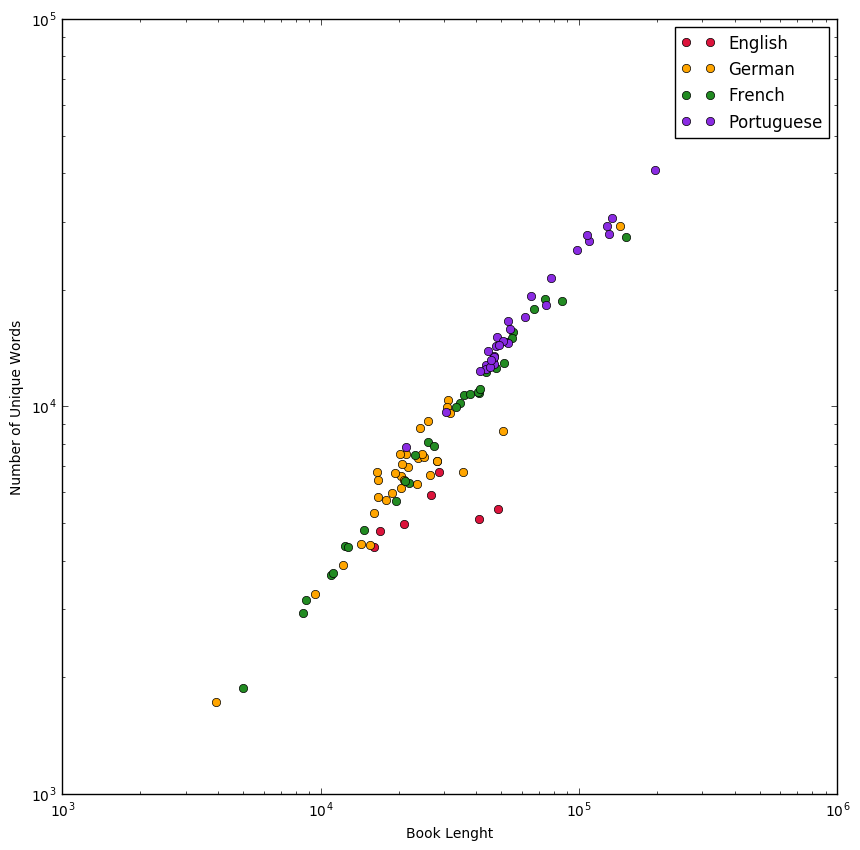

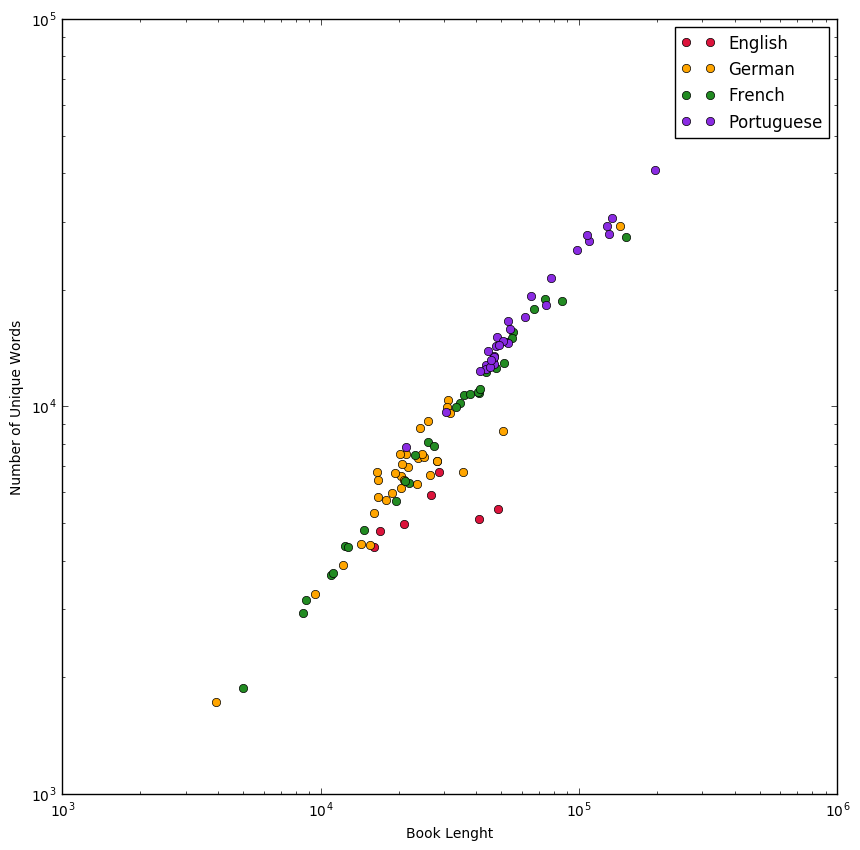

In [75]:
plt.figure(figsize = (10,10))
#English
subset = stats[stats.Language == 'English']
plt.loglog(subset.Length, subset.Unique, 'o', label = 'English', color = 'crimson')
#German
subset = stats[stats.Language == 'German']
plt.loglog(subset.Length, subset.Unique, 'o', label = 'German', color = 'orange')
#French
subset = stats[stats.Language == 'French']
plt.loglog(subset.Length, subset.Unique, 'o', label = 'French', color = 'forestgreen')
#Portuguese
subset = stats[stats.Language == 'Portuguese']
plt.loglog(subset.Length, subset.Unique, 'o', label = 'Portuguese', color = 'blueviolet')

plt.legend();
plt.xlabel('Book Lenght')
plt.ylabel('Number of Unique Words')
plt.savefig('./books/lang_plot.pdf')
plt.show()

#### Plotting Book Statistics: Question 1

```stats``` is a Pandas dataframe as defined in Video 3.2.6. How can you access the column "length" in this dataframe?

- ```stats->length```
- **```stats.length```**
- ```stats[length]```
- **```stats["length"]```**
- ```stats[,"length"]```

#### Plotting Book Statistics: Question 2

```stats``` is a Pandas dataframe as defined in Video 3.2.6. How can you select only the rows where the language is French?

- ```stats.language == "French"```
- ```stats[language == "French"]```
- ```stats.French```
- **```stats[stats.language == "French"]```**